In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score 

In [29]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = [
    'status', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings', 'employment', 'installment_rate', 'personal_status',
    'other_debtors', 'residence_since', 'property', 'age',
    'other_installment_plans', 'housing', 'existing_credits', 'job',
    'num_dependents', 'telephone', 'foreign_worker', 'credit_risk'
]

df = pd.read_csv(url, names=column_names, sep=' ')

In [30]:
print(df.head())
print(df['credit_risk'].value_counts())

  status  duration credit_history purpose  credit_amount savings employment  \
0    A11         6            A34     A43           1169     A65        A75   
1    A12        48            A32     A43           5951     A61        A73   
2    A14        12            A34     A46           2096     A61        A74   
3    A11        42            A32     A42           7882     A61        A74   
4    A11        24            A33     A40           4870     A61        A73   

   installment_rate personal_status other_debtors  ...  property age  \
0                 4             A93          A101  ...      A121  67   
1                 2             A92          A101  ...      A121  22   
2                 2             A93          A101  ...      A121  49   
3                 2             A93          A103  ...      A122  45   
4                 3             A93          A101  ...      A124  53   

   other_installment_plans housing existing_credits   job num_dependents  \
0               

In [31]:
df['credit_risk'] = df['credit_risk'].apply(lambda x: 1 if x == 1 else 0)

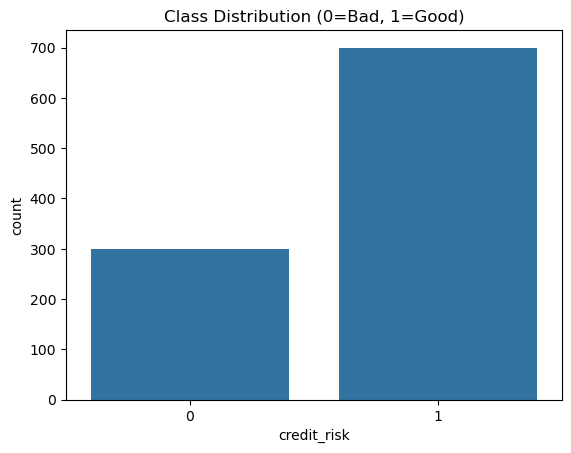

In [32]:
sns.countplot(x='credit_risk', data=df)
plt.title('Class Distribution (0=Bad, 1=Good)')
plt.show()

In [33]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [34]:
# Split features and target
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

In [38]:
# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'Accuracy': model.score(X_test, y_test),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

In [39]:
pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.740,0.801370,0.835714,0.818182,0.782262
Random Forest,0.775,0.806452,0.892857,0.847458,0.810179
XGBoost,0.710,0.784722,0.807143,0.795775,0.755000


In [40]:
# Confusion matrix
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

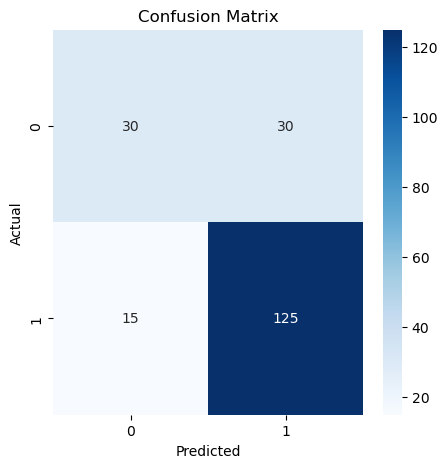

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
# tree-based models
importances = model.feature_importances_
feature_names = X.columns

In [43]:
# DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

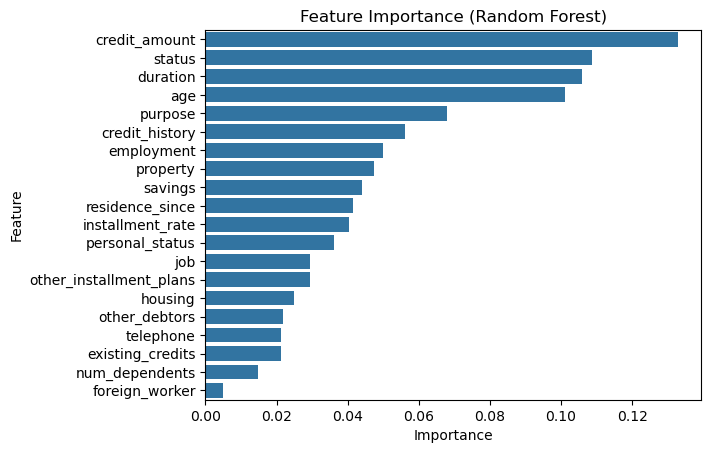

In [44]:
# Plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()